# Load model


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [14]:
!mkdir model
!cp "/content/drive/My Drive/ML Model/mobilenetv2 pretrained/model.h5" model/model.h5
!ls model

mkdir: cannot create directory ‘model’: File exists
model.h5


Dependencies

In [15]:
import tensorflow as tf

Load model

In [4]:
labels = {0: 'cardboard', 1: 'glass', 2: 'metal', 3: 'paper', 4: 'plastic', 5: 'trash'}

In [12]:
module_selection = ("mobilenet_v2", 224, 1280) #@param ["(\"mobilenet_v2\", 224, 1280)", "(\"inception_v3\", 299, 2048)"] {type:"raw", allow-input: true}
handle_base, pixels, FV_SIZE = module_selection
MODULE_HANDLE ="https://tfhub.dev/google/tf2-preview/{}/feature_vector/4".format(handle_base)
IMAGE_SIZE = (pixels, pixels)
print("Using {} with input size {} and output dimension {}".format(MODULE_HANDLE, IMAGE_SIZE, FV_SIZE))

Using https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4 with input size (224, 224) and output dimension 1280


In [13]:
import tensorflow_hub as hub
do_fine_tuning = True #@param {type:"boolean"}

layers = hub.KerasLayer(MODULE_HANDLE,
                                   input_shape=IMAGE_SIZE + (3,), 
                                   output_shape=[FV_SIZE],
                                   trainable=do_fine_tuning)

In [16]:
model = tf.keras.models.load_model('model/model.h5', custom_objects={'KerasLayer': layers})

Saving kardus.jpg to kardus (1).jpg
Maximum Probability:  0.99880326
Classified: cardboard


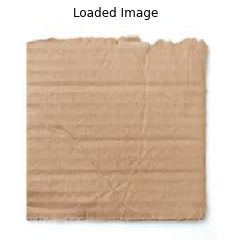

In [21]:
import matplotlib.pyplot as plt
from google.colab import files
from keras.preprocessing import image
import numpy as np

uploaded = files.upload()

for fn in uploaded.keys():
 
  path = '/content/' + fn
  img = image.load_img(path, target_size=IMAGE_SIZE)
  x = image.img_to_array(img)
  #img=np.array(img)/255.0
  x=np.expand_dims(x, axis=0)
  images = np.vstack([x])
  images /= 255

  plt.title("Loaded Image")
  plt.axis('off')
  plt.imshow(img)

  p=model.predict(images)

  print("Maximum Probability: ",np.max(p[0], axis=-1))
  predicted_class = labels[np.argmax(p[0], axis=-1)]
  print("Classified:",predicted_class)